## The task is to predict the optimum number of clusters from the 'iris' dataset and present it visually

## Importing libraries and loading the Iris dataset

In [22]:
#Importing libraries
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
#Loading dataset
iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


## Visualizing the Iris Dataset

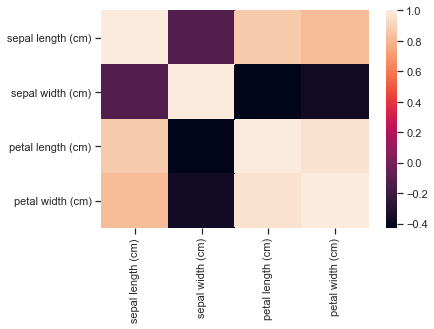

In [26]:
import seaborn as sb
sb.heatmap(iris_df.corr())

## Finding the optimum number of clusters for k-means classification

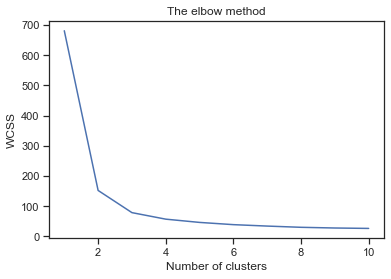

In [34]:
from sklearn.cluster import KMeans
x=iris_df.iloc[:, [0, 1, 2, 3]].values
wcss=[] # Within cluster sum of squares
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# Plotting the results onto a line graph and observing the elbow
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

###### from the elbow method, we can see the optimum number of clusters is 3

In [19]:
# Applying kmeans to the dataset / Creating the kmeans classifier
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import datasets
iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data, columns=iris.feature_names)
x=iris_df.iloc[:, [0, 1, 2, 3]].values
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
y_kmeans=kmeans.fit_predict(x)

## Visualizing clusters and plotting their centroids

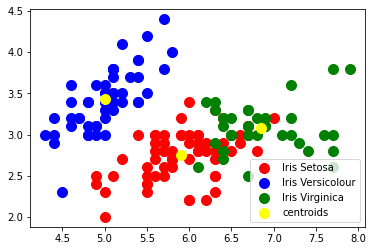

In [20]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='red', label='Iris Setosa')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='blue', label='Iris Versicolour')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='green', label='Iris Virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label='centroids')
plt.legend()